# ANOVA Test (F-Test)
    The t-test works well when dealing with two groups, but sometimes we want  to compare more than two groups at the same time.

    For example, if we wanted to test whether petal_width age differs based on  some categorical variable like species, we have to compare the means of each level or group the variable



## ONE-WAY F-test(ANOVA)
    It tells whether two or more groups are similar or not based on their mean similarity and f-score.

### Example : 
    There are 3 different category of iris flowers and on basis of their petal width  we need to check whether all 3 group are similar or not.
   

In [3]:
import seaborn as sns
dataframe = sns.load_dataset("iris")
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataframe.shape

(150, 5)

In [12]:
## checking petal_width against three(more than two) categories
dataframe_anova = dataframe[['petal_width','species']]
dataframe_anova

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [11]:
import pandas as pd

group_species = pd.unique(dataframe_anova.species)
group_species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

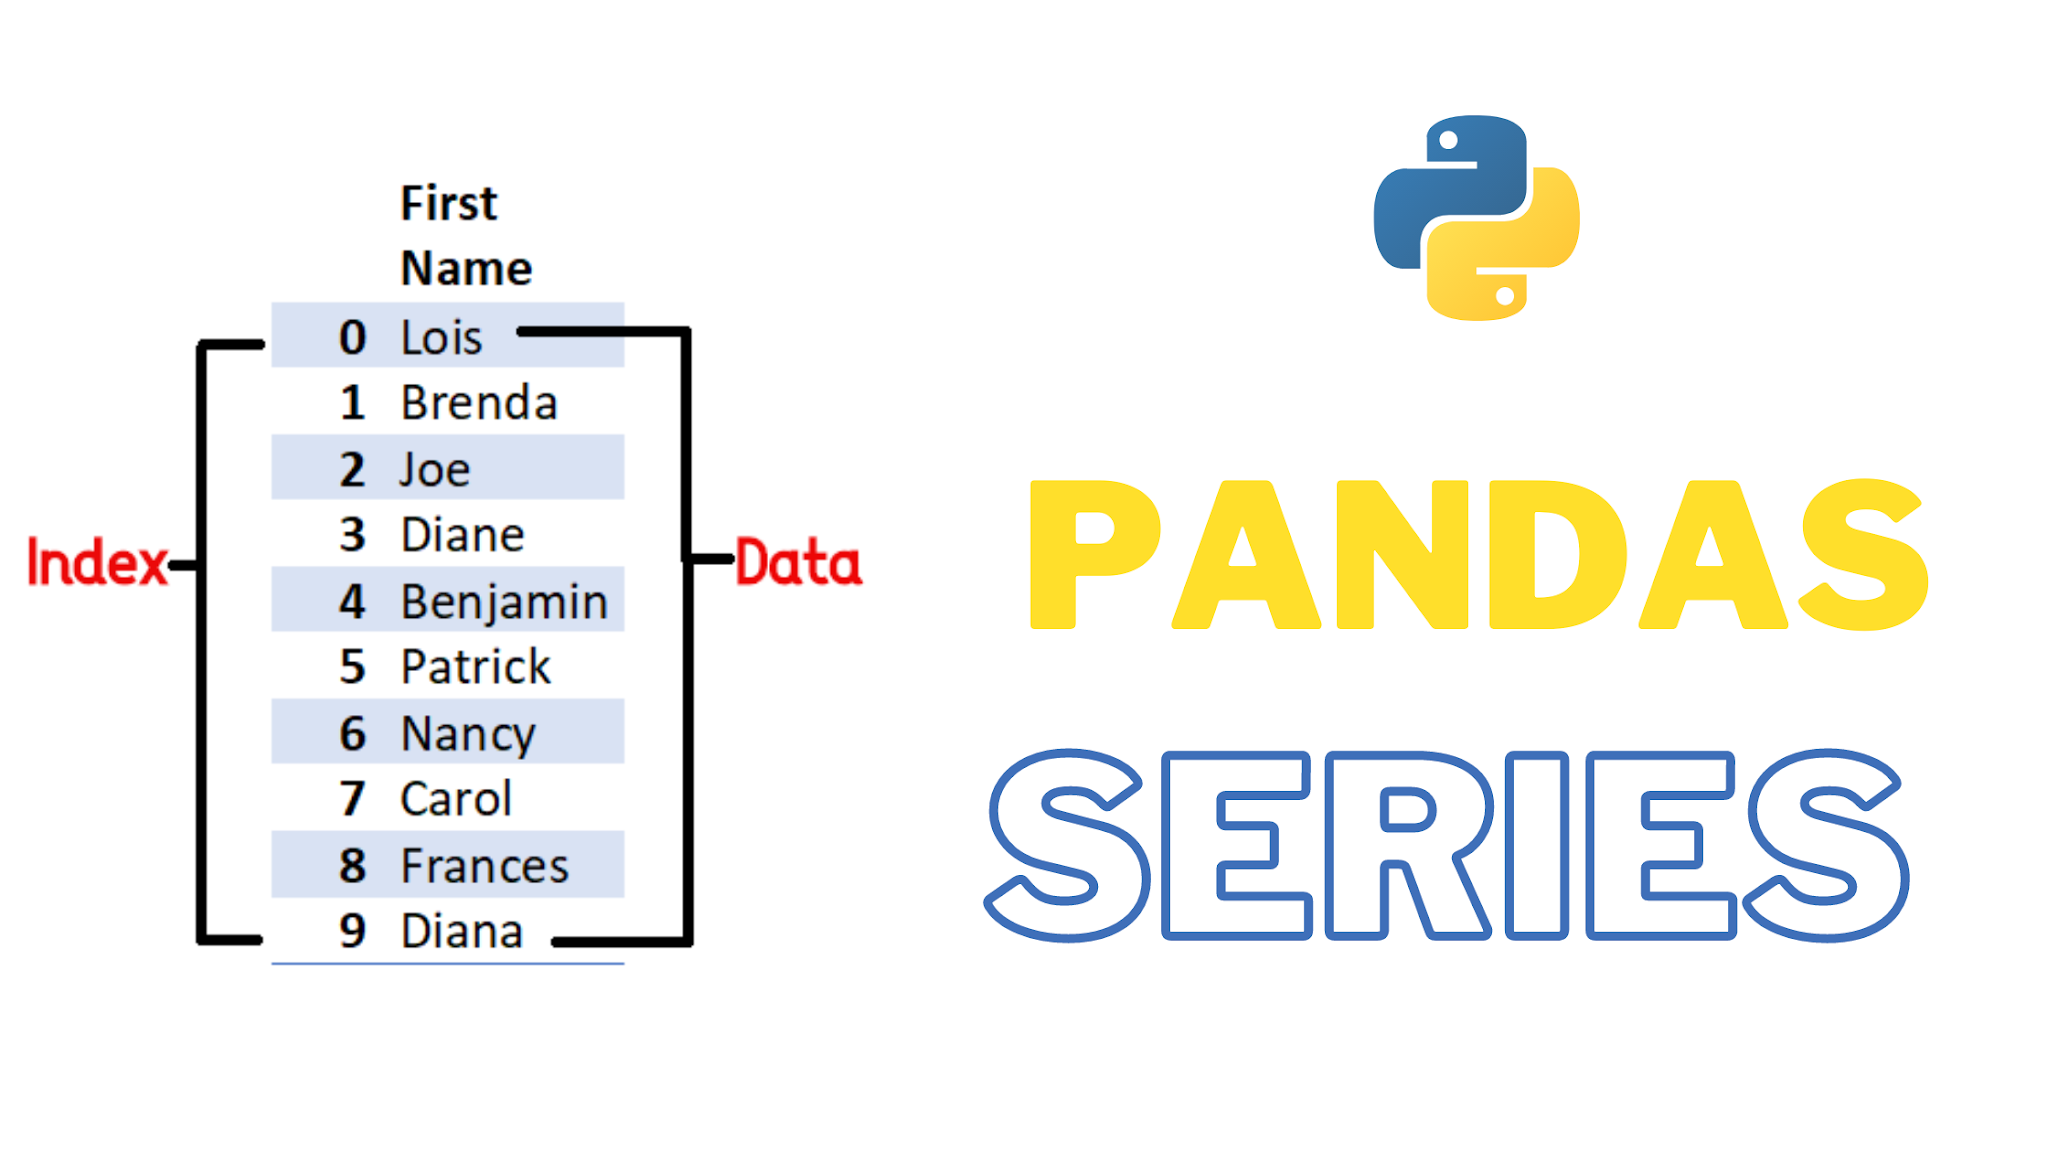

In [18]:
dataframe_anova['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [14]:
## Dictionary Comprehension
d_data = {grp:dataframe_anova['petal_width'][dataframe_anova.species==grp] for grp in group_species}

In [20]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [24]:
print(d_data['setosa'],d_data['versicolor'],d_data['virginica'])
print(type(d_data['setosa']))

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64 50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
55    1.3
56    1.6
57    1.0
58    1.3
59    1.4
60    1.0
61    1.5
62    1.0
63    1.4
64    1.3
65    1.4
66    1.5
67    1.0
68    1.5
69    1.1
70    1.8
71    1.3
72    1.5
73    1.2
74    1.3
75    1.4
76    1.4
77    1.7
78    1.5
79    1.0
80    1.1
81    1.0
82    1.2
83    1.6
84    1.5
85    1.6
86    1.5
87    1.3
88    1.3
89    1.3
90    1.2
91    1.4
92    1.2
93    1.0
94    1.3
95    1.2
96    

In [26]:
import scipy.stats as stats

F,p = stats.f_oneway(d_data['setosa'],d_data['versicolor'],d_data['virginica'])

In [27]:
print(p)

4.169445839443116e-85


In [29]:
if p<0.05:
    print("Rejecting NUll Hypotyhesis")
else:
    print("Accepting NUll hypothesis")

Rejecting NUll Hypotyhesis
